In [1]:
# Import required modules
import pandas as pd

In [2]:
# Read data
run_times = pd.read_excel('Run Times.xlsx')

In [3]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [4]:
# Find the data types
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [5]:
run_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


In [6]:
# Convert the Fee column data data type to numeric instead of object
run_times.Fee = pd.to_numeric(run_times.Fee.str.replace('$',''))

In [7]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [8]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [9]:
# Convert 'Warm Up Time' column data type to numeric
pd.to_numeric(run_times['Warm Up Time'], errors='coerce')

0    3.5
1    3.5
2    NaN
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [10]:
run_times['Warm Up Time'].str.replace(' min','')

0    NaN
1    NaN
2      3
3    NaN
4    NaN
Name: Warm Up Time, dtype: object

In [11]:
run_times['Warm Up Time'] = pd.to_numeric(run_times['Warm Up Time'].astype(str).str.replace(' min', ''))

In [12]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time           float64
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [13]:
run_times.head()

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [14]:
# Change bools to 0 and 1s
run_times.Rain.astype('int')

0    0
1    1
2    0
3    0
4    0
Name: Rain, dtype: int32

## Missing Data

In [15]:
df = pd.read_excel('Student Grades.xlsx')

In [16]:
df.tail()

,Student,Class,Year,Grade
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [17]:
import numpy as np

In [18]:
np.NAN

nan

In [19]:
pd.NA

<NA>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [21]:
df.Year.value_counts(dropna=False)

Year
Freshman     35
Sophomore    24
Junior       20
NaN           6
Senior        1
Name: count, dtype: int64

In [22]:
df.isna()

,Student,Class,Year,Grade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
81,True,True,True,True
82,False,True,True,True
83,True,False,False,False
84,False,False,False,True


In [23]:
df.isna().sum()

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [24]:
df.isna().any(axis=1)

0     False
1     False
2     False
3     False
4     False
      ...  
81     True
82     True
83     True
84     True
85     True
Length: 86, dtype: bool

In [25]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [26]:
df[df.isna().any(axis=1)].dropna(subset=['Student', 'Class'])

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [27]:
df.dropna(subset=['Student', 'Class'], inplace=True)

In [28]:
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
77,Aaron,EDA,Junior,85.0
78,Charles,EDA,Junior,93.0
79,Connor,EDA,Junior,91.0
80,Riley,EDA,Junior,87.0


In [29]:
df[df.Grade.isna()]

,Student,Class,Year,Grade
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [30]:
df.Grade.mean()

85.55

In [31]:
df.Grade.fillna(value=df.Grade.mean(), inplace=True)

In [32]:
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 82, dtype: float64

In [33]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [34]:
# Let's look into Freshman Seminar class more
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [35]:
# Put 'Freshman' in all rows in Year Column
df.loc[7, 'Year'] = 'Freshman'

In [36]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,Freshman,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [37]:
# Update multiple values using np.where
import numpy as np

df.Year = np.where(df.Year.isna(), 'Freshman', df.Year)

In [38]:
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,Freshman,88.0
8,William,Freshman Seminar,Freshman,89.0
9,Ethan,Freshman Seminar,Freshman,86.0


In [39]:
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,EDA,Junior,85.00
78,Charles,EDA,Junior,93.00
79,Connor,EDA,Junior,91.00
80,Riley,EDA,Junior,87.00


## Inconsistent Text & Typos

In [40]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [41]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [42]:
df[df.Class.isin(['Exploratory Data Analysis', 'EDA'])]

,Student,Class,Year,Grade
58,Evelyn,Exploratory Data Analysis,Sophomore,89.00
59,Jack,Exploratory Data Analysis,Sophomore,84.00
60,Ella,Exploratory Data Analysis,Sophomore,200.00
61,Chloe,Exploratory Data Analysis,Sophomore,87.00
62,Landon,Exploratory Data Analysis,Junior,85.55
63,Christian,Exploratory Data Analysis,Junior,77.00
64,Jordan,Exploratory Data Analysis,Junior,83.00
65,Jonathan,Exploratory Data Analysis,Junior,82.00
66,Levi,Exploratory Data Analysis,Junior,91.00
67,Victoria,Exploratory Data Analysis,Junior,90.00


In [43]:
df[df.Class.isin(['Intro to Python', 'Python'])]

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [44]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [45]:
df.Year.value_counts()

Year
Freshman     38
Sophomore    24
Junior       19
Senior        1
Name: count, dtype: int64

In [46]:
df.Grade.describe()

count     82.000000
mean      85.550000
std       15.443965
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      200.000000
Name: Grade, dtype: float64

In [47]:
df[df.Grade > 100]

,Student,Class,Year,Grade
60,Ella,Exploratory Data Analysis,Sophomore,200.0


### Handling and Updating Inconsistent Data & Typos

In [48]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [49]:
import numpy as np
df.Class = np.where(df.Class == 'EDA', 'Exploratory Data Analysis', df.Class)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
77    Exploratory Data Analysis
78    Exploratory Data Analysis
79    Exploratory Data Analysis
80    Exploratory Data Analysis
84    Exploratory Data Analysis
Name: Class, Length: 82, dtype: object

In [50]:
df.Class.value_counts()

Class
Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Python                        1
Name: count, dtype: int64

In [51]:
df.Class = np.where(df.Class == 'Python', 'Intro to Python', df.Class)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
77    Exploratory Data Analysis
78    Exploratory Data Analysis
79    Exploratory Data Analysis
80    Exploratory Data Analysis
84    Exploratory Data Analysis
Name: Class, Length: 82, dtype: object

In [52]:
df.Class.value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

In [53]:
df.Grade = np.where(df.Grade > 100, 100, df.Grade)
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 82, dtype: float64

In [54]:
df.Grade.describe()

count     82.000000
mean      84.330488
std        8.824663
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      100.000000
Name: Grade, dtype: float64

## Mapping

In [55]:
df_grades = pd.read_excel('Student Grades.xlsx')

In [56]:
df_grades.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [57]:
df_grades.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [58]:
class_mappings = {'Intro to Python': 'Intro to Python',
                  'Intro to SQL': 'Intro to SQL',
                  'EDA': 'Exploratory Data Analysis',
                  'Freshman Seminar': 'Freshman Seminar',
                  'Exploratory Data Analysis': 'Exploratory Data Analysis',
                  'Python': 'Intro to Python'}

In [59]:
df_grades.Class = df_grades.Class.map(class_mappings)

In [60]:
df_grades.Class.value_counts()

Class
Intro to Python              26
Exploratory Data Analysis    25
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

## Cleaning Text

In [61]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,“the gym”,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,“gym”,2023-05-10 16:30:00,2023-06-15,False,2.5


In [62]:
run_times.Location

0     “school”
1       School
2    “the gym”
3     “school”
4        “gym”
Name: Location, dtype: object

In [63]:
run_times.Location = run_times.Location.str.lower().str.replace('the ', '').str.strip('“”')

In [64]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,school,2023-04-15 12:00:00,2023-06-01,False,0.0
1,Alexis,10.3842,3.5,school,2023-04-22 12:30:00,2023-06-01,True,0.0
2,Alexis,8.1209,3.0,gym,2023-05-10 15:00:00,2023-06-01,False,2.5
3,David,7.2123,2.2,school,2023-05-01 15:15:00,2023-06-15,False,0.0
4,David,6.8342,2.0,gym,2023-05-10 16:30:00,2023-06-15,False,2.5


## Duplicate Data

In [65]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [66]:
df[df.duplicated()]

,Student,Class,Year,Grade
19,Mia,Intro to Python,Freshman,80.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [67]:
df[df.duplicated(keep=False)]

,Student,Class,Year,Grade
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Intro to Python,Freshman,80.0
42,Isaac,Intro to SQL,Sophomore,96.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df[df.duplicated(keep=False)]

,Student,Class,Year,Grade


In [70]:
df.iloc[40:45, :]

,Student,Class,Year,Grade
41,Charlotte,Intro to SQL,Sophomore,92.0
42,Isaac,Intro to SQL,Sophomore,96.0
45,Harper,Intro to SQL,Sophomore,93.0
46,Ryan,Intro to SQL,Sophomore,76.0
47,Sofia,Intro to SQL,Sophomore,79.0


In [71]:
df.reset_index(drop=True, inplace=True)

In [72]:
df.iloc[40:45, :]

,Student,Class,Year,Grade
40,Charlotte,Intro to SQL,Sophomore,92.0
41,Isaac,Intro to SQL,Sophomore,96.0
42,Harper,Intro to SQL,Sophomore,93.0
43,Ryan,Intro to SQL,Sophomore,76.0
44,Sofia,Intro to SQL,Sophomore,79.0


## Finding outliers

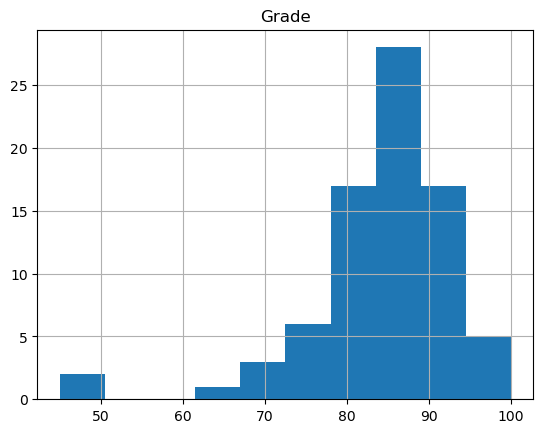

In [73]:
# 1. Use Histogram

df.hist();

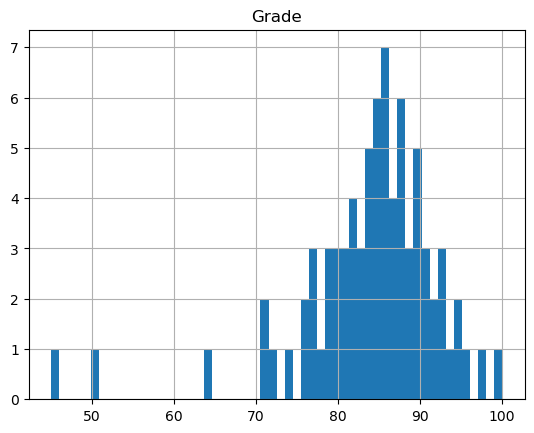

In [74]:
df.hist(bins=int(df['Grade'].max() - df['Grade'].min() + 1));

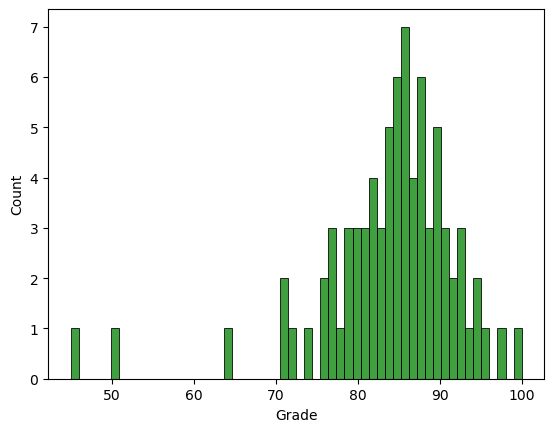

In [75]:
# 1. Use Histogram
import seaborn as sns
sns.histplot(df['Grade'], bins=int(df['Grade'].max() - df['Grade'].min() + 1), color='green');
# sns.histplot(df['Grade'], binwidth=1, color='red');

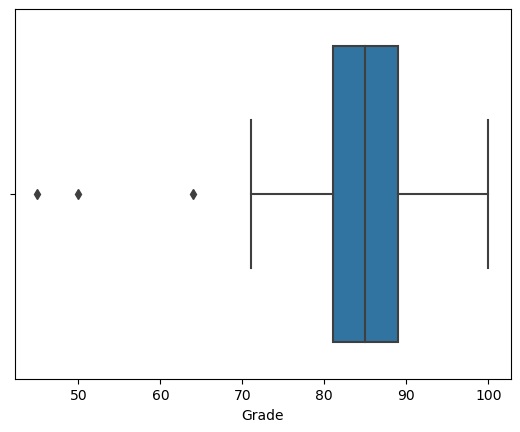

In [76]:
# 2. Use Boxplots
sns.boxplot(x=df.Grade);

In [77]:
import numpy as np

In [78]:
import numpy as np
q25, q50, q75 = np.percentile(df.Grade, [25, 50, 75])

In [79]:
iqr = q75 - q25

In [80]:
min_grade = q25 - 1.5*iqr
max_grade = q75 + 1.5*iqr

In [81]:
min_grade, q25, q50, q75, max_grade

(69.0, 81.0, 85.0, 89.0, 101.0)

In [82]:
df[df.Grade < 69]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0
66,Jaxon,Exploratory Data Analysis,Junior,64.0


In [83]:
# 3. Use Standard Deviation
sd = df['Grade'].std()
mean = df['Grade'].mean()
mean, sd

(84.08987341772152, 8.779468252934475)

In [84]:
# Using numpy
mean = np.mean(df.Grade)
sd = np.std(df.Grade)
mean, sd

(84.08987341772152, 8.723725033779411)

In [85]:
[grade for grade in df.Grade if (grade < mean - 3*sd) or (grade > mean + 3*sd)]

[50.0, 45.0]

In [86]:
[grade for grade in df.Grade if (grade < mean - 2*sd) or (grade > mean + 2*sd)]

[50.0, 45.0, 64.0]

In [87]:
[grade for grade in df.Grade if (grade < mean - 4*sd) or (grade > mean + 4*sd)]

[45.0]

In [88]:
df.Grade.sort_values()

53     45.0
36     50.0
66     64.0
35     71.0
39     71.0
      ...  
67     95.0
32     95.0
41     96.0
49     98.0
57    100.0
Name: Grade, Length: 79, dtype: float64

## Handling Outliers

In [89]:
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [90]:
df.shape

(79, 4)

In [91]:
df[df.Grade < 60]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0


In [92]:
df[df.Grade >= 60]

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


In [93]:
df[df.Grade < 60]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0


In [94]:
min_grade = df[df.Grade >= 60].Grade.min()
min_grade

64.0

In [95]:
df.Grade = np.where(df.Grade < 60, min_grade, df.Grade)
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
74    85.00
75    93.00
76    91.00
77    87.00
78    85.55
Name: Grade, Length: 79, dtype: float64

In [96]:
df[df.Grade < 60]

,Student,Class,Year,Grade


In [97]:
df.loc[[36, 53]]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,64.0
53,Wyatt,Intro to SQL,Sophomore,64.0


In [98]:
df[df['Student'] == 'John']

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,64.0


In [99]:
df.loc[36, 'Grade'] = 74

In [100]:
df[df['Student'] == 'John']

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,74.0


In [101]:
# Missing values
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade


In [102]:
# Inconsistent text and typos  
df.Class.value_counts() 

Class
Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 18
Freshman Seminar             12
Name: count, dtype: int64

In [103]:
# Duplicate case
df[df.duplicated()]

,Student,Class,Year,Grade


<AxesSubplot: ylabel='Count'>

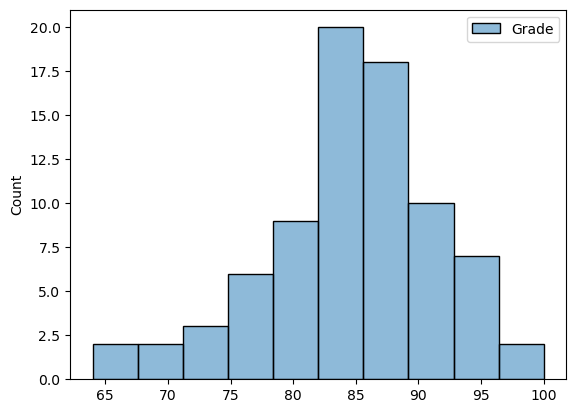

In [104]:
# Outliers
sns.histplot(df)

## Creating New Columns

In [105]:
groceries = pd.read_excel('groceries.xlsx')

In [106]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15


In [107]:
groceries['New Column'] = round(groceries.Price_Dollars * 1.05, 2)

In [108]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19


In [109]:
groceries.Inventory.sum()

4857

In [110]:
groceries['Total Inventory'] = groceries.Inventory.sum()

In [111]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857


In [112]:
groceries['Percent Inventory'] = round(groceries['Inventory'] / groceries['Total Inventory'] * 100, 2)

In [113]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05


In [114]:
import numpy as np

In [115]:
groceries['Low Inventory'] = np.where(groceries['Inventory'] < 50, 'Low Inventory', '')

In [116]:
groceries.head(20)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,
5,P100015,Produce: Fruit,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15,6.29,4857,2.04,
6,P100016,Produce: Vegetable,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15,1.87,4857,1.61,
7,P100017,Produce: Vegetable,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15,2.10,4857,4.12,
8,P100018,Produce: Vegetable,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15,2.09,4857,1.03,
9,P100019,Produce: Vegetable,Cucumber,0.99,230,2023-06-12 17:47:00,2023-06-15,1.04,4857,4.74,


In [117]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,


In [118]:
groceries['Last_Updated_Time'] = groceries.Last_Updated.dt.time

In [119]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00


In [120]:
groceries['Shipment_Date_DOW'] = groceries.Next_Scheduled_Shipment.dt.dayofweek

In [121]:
dow_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [122]:
groceries['Shipment_Date_DOW'] = groceries['Shipment_Date_DOW'].map(dow_mapping)

In [123]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,Thursday
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,Thursday
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,Thursday
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,Thursday
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,Thursday


In [124]:
groceries['New_Shipment_Date'] = groceries['Next_Scheduled_Shipment'] + pd.to_timedelta(1, 'D')

In [125]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,Thursday,2023-06-16
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,Thursday,2023-06-16
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,Thursday,2023-06-16
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,Thursday,2023-06-16
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,Thursday,2023-06-16


In [126]:
groceries['New_Shipment_Date'] = np.where(groceries['Category'] == 'Produce: Fruit', groceries['Next_Scheduled_Shipment'] + pd.to_timedelta(1, 'D'), groceries['Next_Scheduled_Shipment'])

In [128]:
groceries.head(20)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,Thursday,2023-06-16
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,Thursday,2023-06-16
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,Thursday,2023-06-16
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,Thursday,2023-06-16
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,Thursday,2023-06-16
5,P100015,Produce: Fruit,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15,6.29,4857,2.04,,19:15:00,Thursday,2023-06-16
6,P100016,Produce: Vegetable,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15,1.87,4857,1.61,,19:25:00,Thursday,2023-06-15
7,P100017,Produce: Vegetable,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15,2.10,4857,4.12,,18:05:00,Thursday,2023-06-15
8,P100018,Produce: Vegetable,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15,2.09,4857,1.03,,16:42:00,Thursday,2023-06-15
9,P100019,Produce: Vegetable,Cucumber,0.99,230,2023-06-12 17:47:00,2023-06-15,1.04,4857,4.74,,17:47:00,Thursday,2023-06-15


## Create text columns

In [156]:
groceries['Product_ID_Num'] = groceries.Product_ID.str[1:]

In [135]:
groceries.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New Column                        float64
Total Inventory                     int64
Percent Inventory                 float64
Low Inventory                      object
Last_Updated_Time                  object
Shipment_Date_DOW                  object
New_Shipment_Date          datetime64[ns]
Product_ID_Num                     object
dtype: object

In [137]:
groceries['Product_ID_Num'] = pd.to_numeric(groceries['Product_ID_Num'])

In [138]:
groceries.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New Column                        float64
Total Inventory                     int64
Percent Inventory                 float64
Low Inventory                      object
Last_Updated_Time                  object
Shipment_Date_DOW                  object
New_Shipment_Date          datetime64[ns]
Product_ID_Num                      int64
dtype: object

In [139]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,Thursday,2023-06-16,100010
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,Thursday,2023-06-16,100011
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,Thursday,2023-06-16,100012
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,Thursday,2023-06-16,100013
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,Thursday,2023-06-16,100014


In [140]:
# Splitting Column
groceries.Category.value_counts()

Category
Produce: Fruit           6
Produce: Vegetable       4
Produce: Dairy           4
Pantry: Snacks           4
Produce: Meat            3
Frozen: Frozen Snacks    2
Frozen: Frozen Fruit     2
Name: count, dtype: int64

In [144]:
groceries[['Category', 'Subcategory']] = pd.DataFrame(groceries.Category.str.split(':').tolist())

In [145]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num,Subcategory
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,Thursday,2023-06-16,100010,Fruit
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,Thursday,2023-06-16,100011,Fruit
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,Thursday,2023-06-16,100012,Fruit
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,Thursday,2023-06-16,100013,Fruit
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,Thursday,2023-06-16,100014,Fruit


In [148]:

groceries['Organic'] = groceries.Item.str.lower().str.contains('organic')
# groceries.Item.str.contains('organic|Organic', regex=True)

In [149]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Product_ID_Num,Subcategory,Organic
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,,15:35:00,Thursday,2023-06-16,100010,Fruit,False
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,,18:30:00,Thursday,2023-06-16,100011,Fruit,False
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,,17:22:00,Thursday,2023-06-16,100012,Fruit,False
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,,16:29:00,Thursday,2023-06-16,100013,Fruit,False
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,,18:10:00,Thursday,2023-06-16,100014,Fruit,True


In [152]:
# Reorder columns
groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars', 'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Last_Updated_Time', 'Next_Scheduled_Shipment', 'Shipment_Date_DOW']].head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Last_Updated_Time,Next_Scheduled_Shipment,Shipment_Date_DOW
0,P100010,100010,Produce,Fruit,Apple,False,1.50,349,7.19,,2023-06-12 15:35:00,15:35:00,2023-06-15,Thursday
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.29,,2023-06-12 18:30:00,18:30:00,2023-06-15,Thursday
2,P100012,100012,Produce,Fruit,Grapes,False,4.00,200,4.12,,2023-06-12 17:22:00,17:22:00,2023-06-15,Thursday
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.03,,2023-06-12 16:29:00,16:29:00,2023-06-15,Thursday
4,P100014,100014,Produce,Fruit,Organic Strawberries,True,3.99,148,3.05,,2023-06-12 18:10:00,18:10:00,2023-06-15,Thursday


In [153]:
groceries_with_new_columns = groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars', 'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Last_Updated_Time', 'Next_Scheduled_Shipment', 'Shipment_Date_DOW']]